## MERSCOPE MENDER-UMAP
### Reproduction of Figure 4H
UMAP embedding on the top of MENDER cellular context representation on a mouse brain atlas using MERSCOPE.

In [1]:
# Imports
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('..')

import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import MENDER as mender

from utils.data_loader import DataLoader

In [2]:
# Load MERSCOPE Dataset from SODB
loader = DataLoader("Dataset13_MS_raw")
adata_dict = loader.load()
adata = list(adata_dict.values())[0]

Loading dataset: Dataset13_MS_raw
load experiment[Dataset13] in dataset[Dataset13_MS_raw]
Dataset loaded successfully.


In [3]:
# Copy the raw data for later use
adata_raw = adata.copy()

In [4]:
batch_obs = 'slice_id'

In [5]:
# Run MENDER
msm = mender.MENDER(
    adata=adata,
    batch_obs=batch_obs,    # Use slice info
    ct_obs='ct',            # Use the cell state got by Leiden
    random_seed=666
)

msm.prepare()

In [6]:
# Set parameters for MENDER
msm.set_MENDER_para(
    nn_mode='radius',
    nn_para=15,         # Radius in microns
    n_scales=6,         # Number of scales to build
    count_rep='s',      # Single-scale frequency count
    include_self=True   # Include the cell itself in its neighborhood count
)

In [7]:
# Extract multi-scale context representation
msm.run_representation_mp(mp=2)     # Use 8 parallel processes

default number of process is 200


In [8]:
# Run clustering on the context representation
# Positive values for the expected number of domains
# Negative values for the clustering resolution
msm.run_clustering_normal(target_k=-1.5)

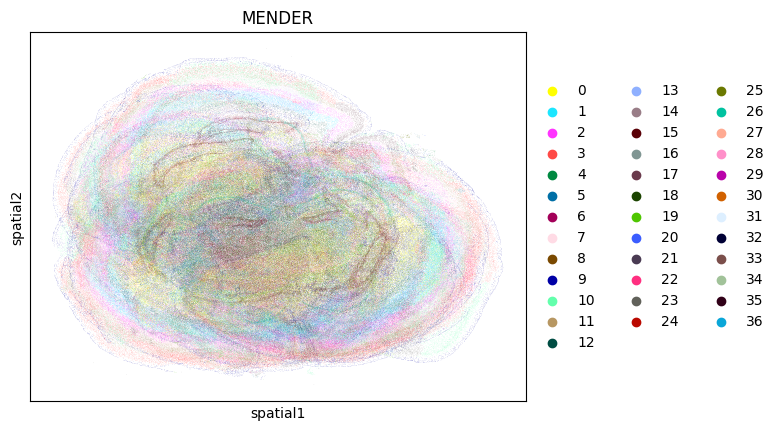

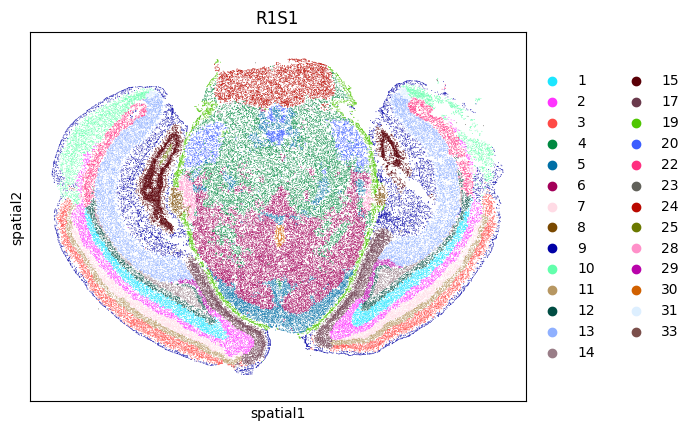

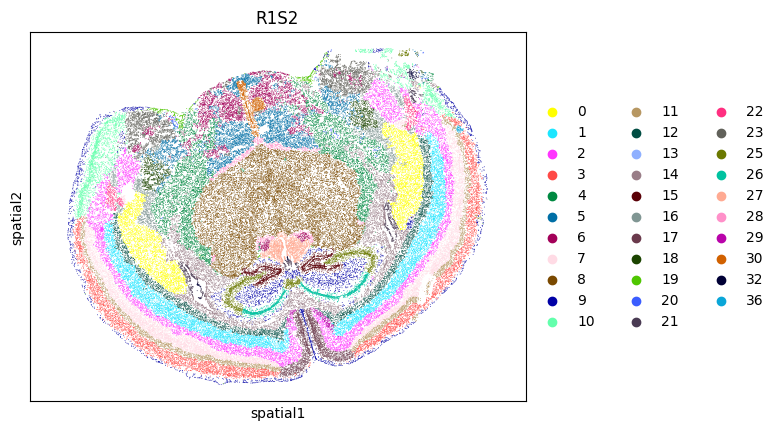

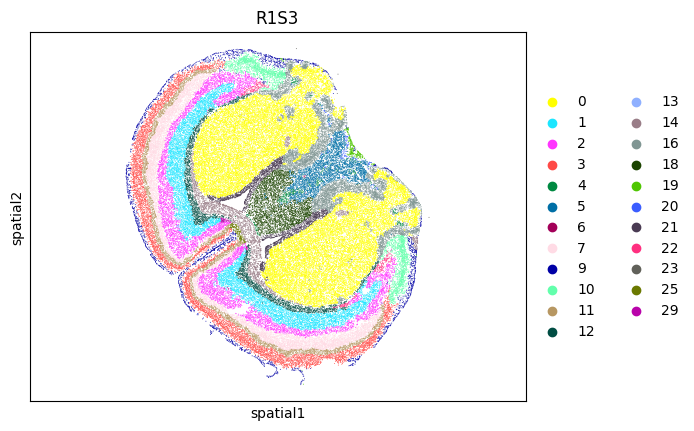

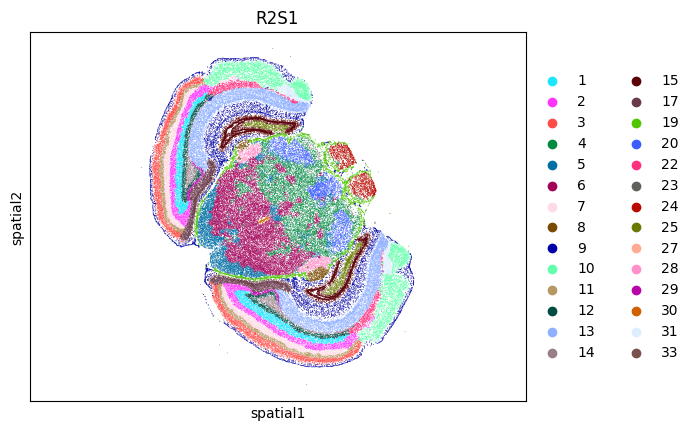

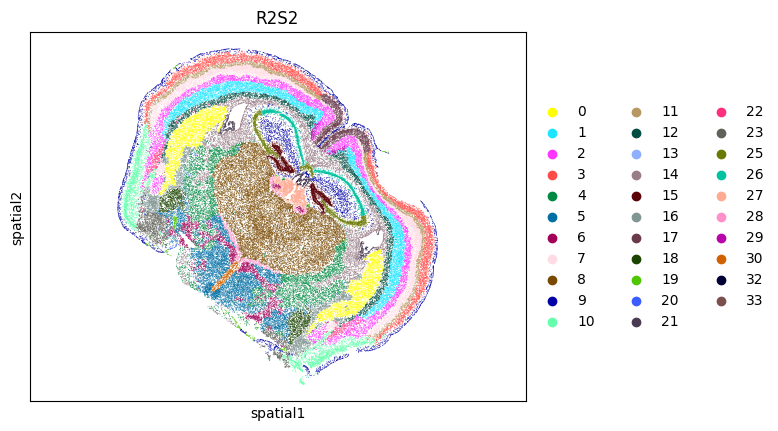

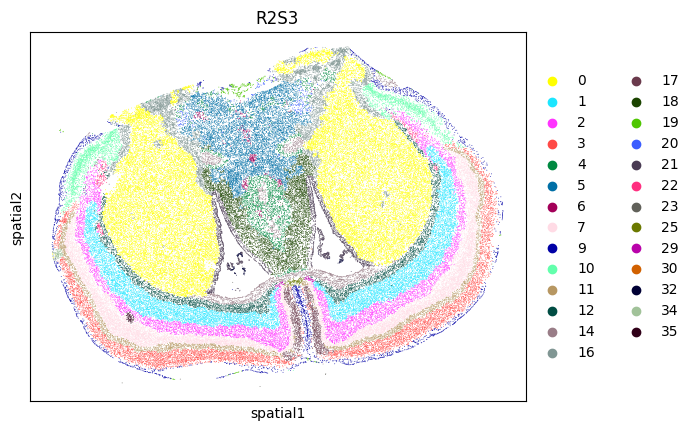

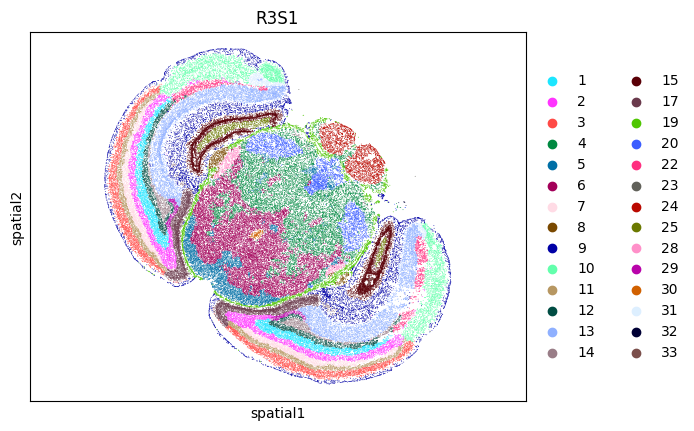

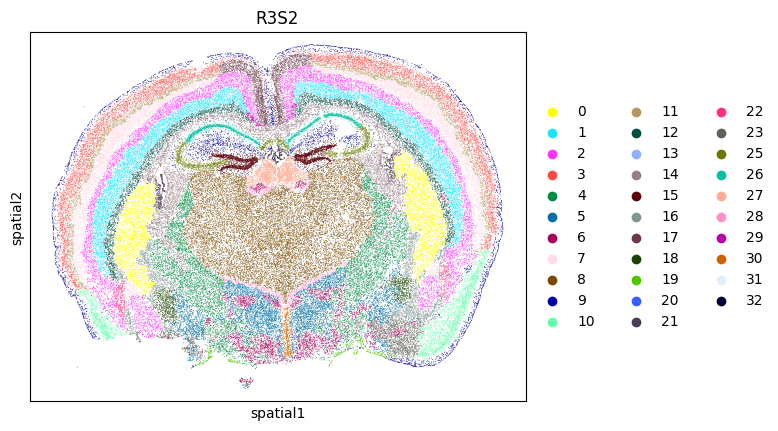

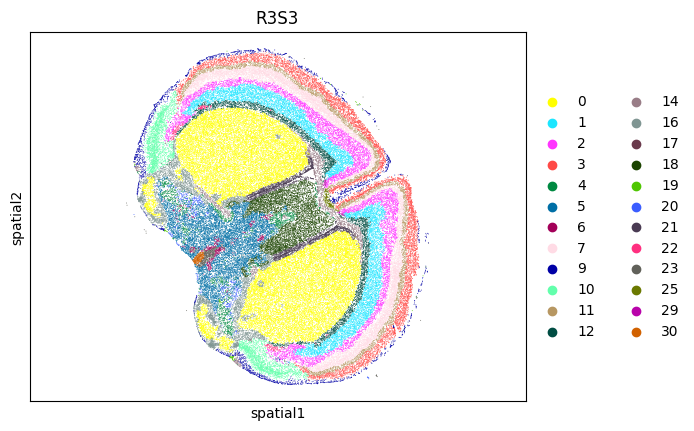

In [91]:
msm.output_cluster_all(obs='MENDER',obs_gt=None)

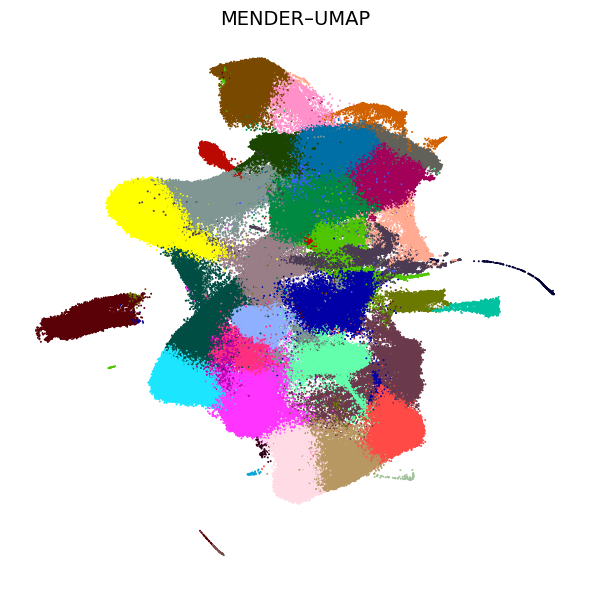

In [11]:
# Create plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot UMAP embedding colored by MENDER clusters
sc.pl.embedding(
    adata,
    basis='X_MENDERMAP2D',
    color='MENDER',
    size=8,
    frameon=False,
    ax=ax,
    show=False,
    legend_loc=None
)

# Final polish
ax.set_title("MENDER–UMAP", fontsize=14)
ax.axis('off')
plt.tight_layout()

# Save to file
plt.savefig("plots/figure_4H_clean.png", dpi=300)
plt.show()

### Reproducing 4B-H

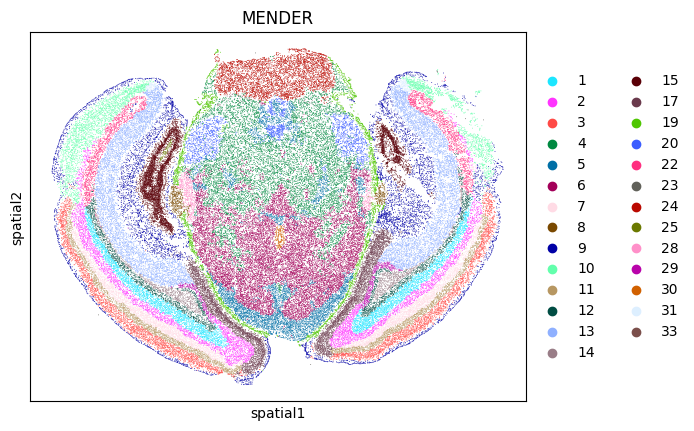

In [25]:
# Showing 1 slice 
cur_a = msm.adata_MENDER[msm.adata_MENDER.obs['slice_id'] == 'R1S1']
sc.pl.embedding(cur_a, basis='spatial', color='MENDER')

In [42]:
import scanpy as sc

# Add function to highlight specific clusters (i.e. regions) for given slices 
def plot_highlighted_clusters(msm, 
                               highlight_clusters, 
                               target_slices, 
                               highlighted_region="Highlighted Region", 
                               color_key='MENDER', 
                               basis='spatial'):
    """
    Plots selected spatial slices with only the specified clusters in color.
    :param highlight_clusters: clusters to highlight
    :param target_slices: slices to show
    :param highlighted_region: highlighted region of brain tissue (for title)
    """
 

    # Get full cluster label set and color map
    full_labels = msm.adata_MENDER.obs[color_key].cat.categories
    full_colors = msm.adata_MENDER.uns[f'{color_key}_colors']
    cluster_color_map = dict(zip(full_labels, full_colors))

    for slice_id in target_slices:
        # Subset data
        cur_a = msm.adata_MENDER[msm.adata_MENDER.obs['slice_id'] == slice_id].copy()

        cur_a.obs[color_key] = cur_a.obs[color_key].cat.set_categories(full_labels)

        # Custom color palette (only highlight what is in highlight_clusters)
        custom_palette = [
            cluster_color_map[label] if label in highlight_clusters else 'lightgray'
            for label in full_labels
        ]

        # Plot slice(s) 
        sc.pl.embedding(
            cur_a,
            basis=basis,
            color=color_key,
            palette=custom_palette,
            title=f'{slice_id}: {highlighted_region}',
            frameon=False,
            show=True
        )


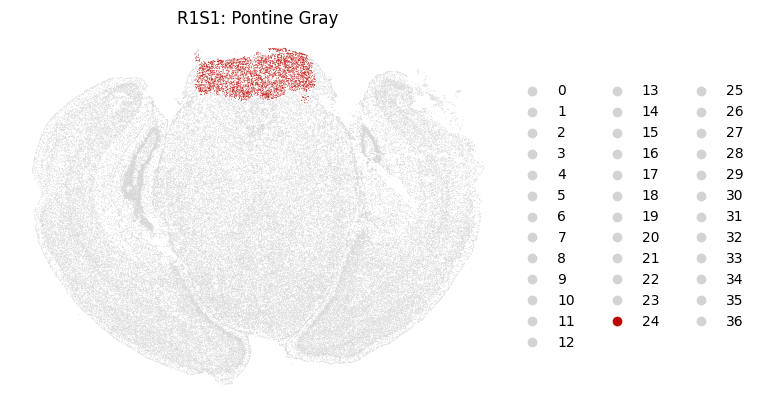

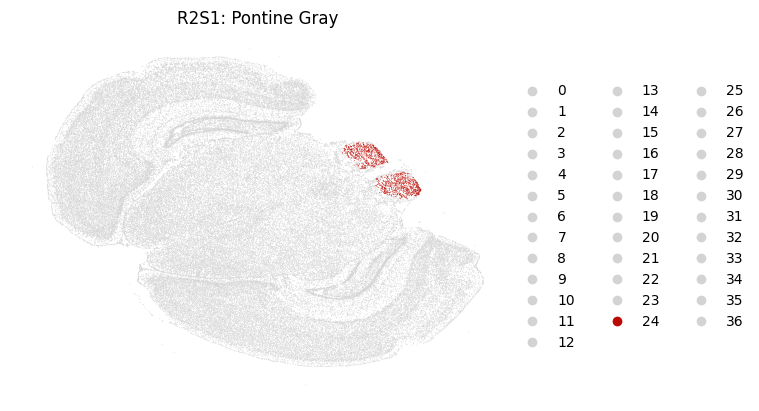

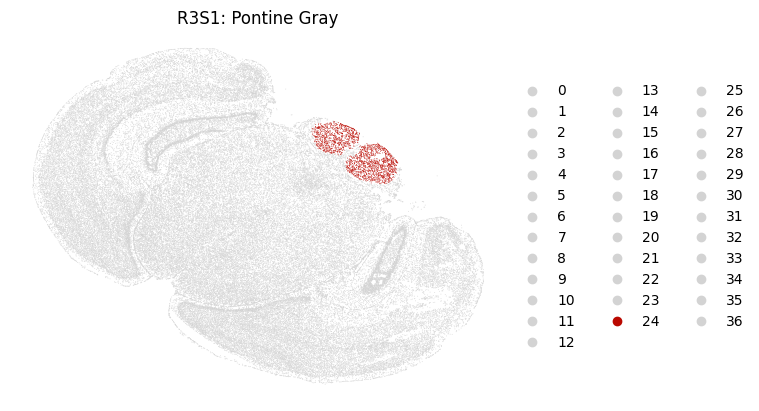

In [43]:
# Highlight Pontine Gray areas 
plot_highlighted_clusters(
    msm,
    highlight_clusters=['24'],
    target_slices=['R1S1', 'R2S1', 'R3S1'],
    highlighted_region='Pontine Gray'
)

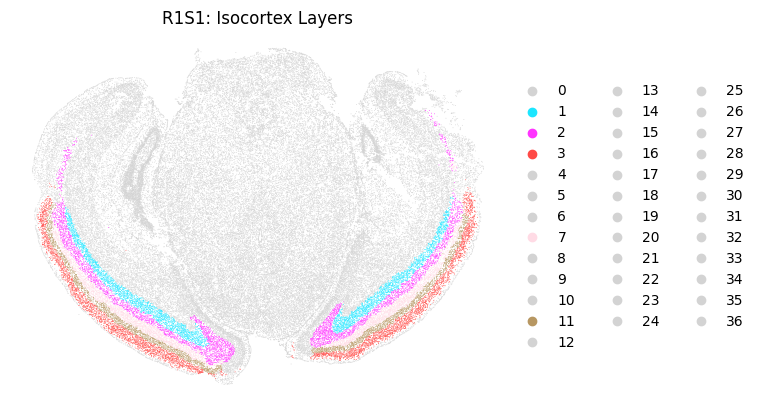

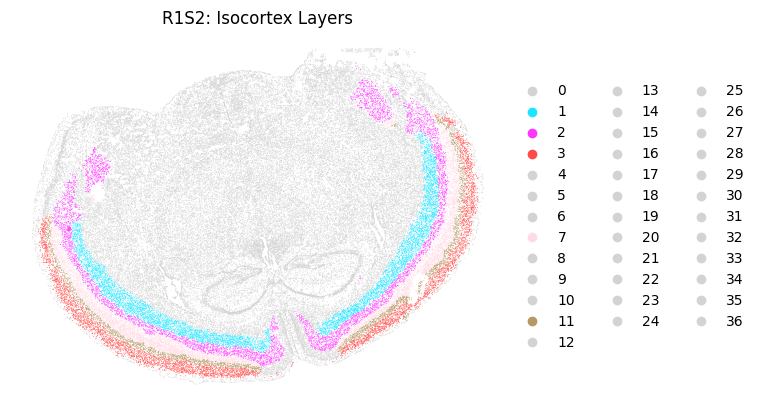

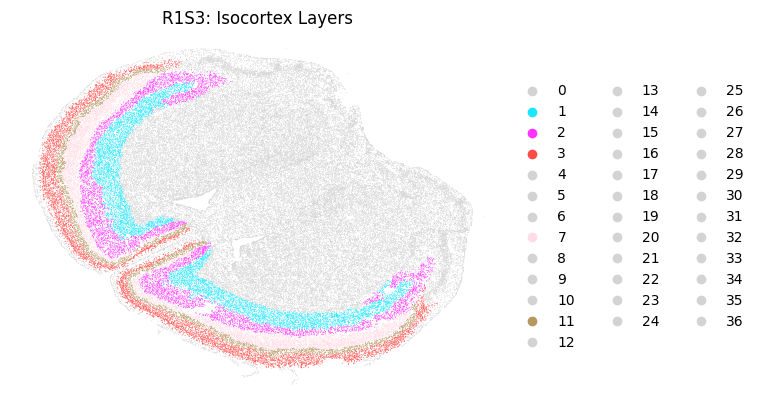

In [45]:
# Highlight Isocortex Layers across different positions
plot_highlighted_clusters(
    msm,
    highlight_clusters=['3', '11', '7', '2', '1'],
    target_slices=['R1S1', 'R1S2', 'R1S3'],
    highlighted_region='Isocortex Layers'
)

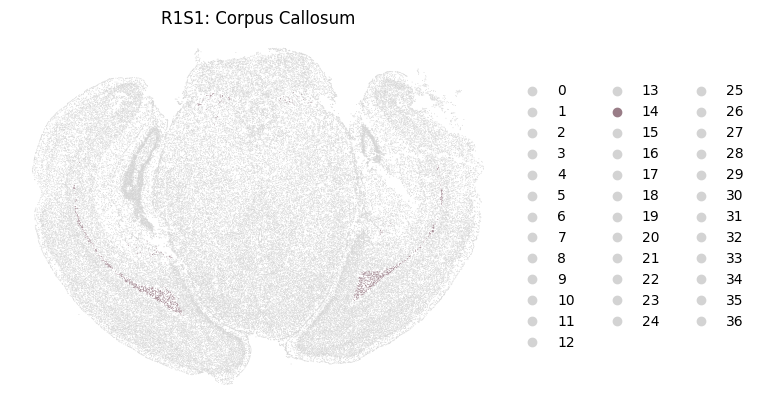

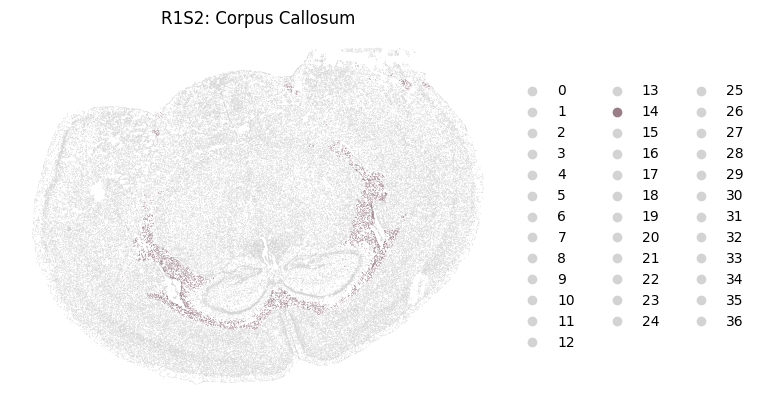

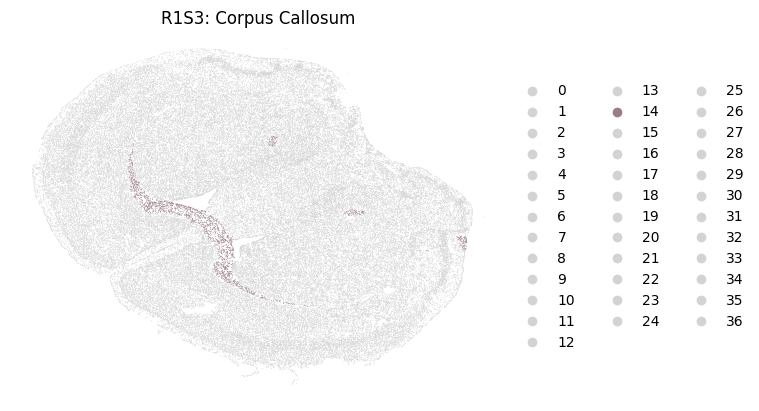

In [47]:
# Highlight Corpus Callosum (across different positions)
plot_highlighted_clusters(
    msm,
    highlight_clusters=['14'],
    target_slices=['R1S1', 'R1S2', 'R1S3'],
    highlighted_region='Corpus Callosum'
)

POSITION 2


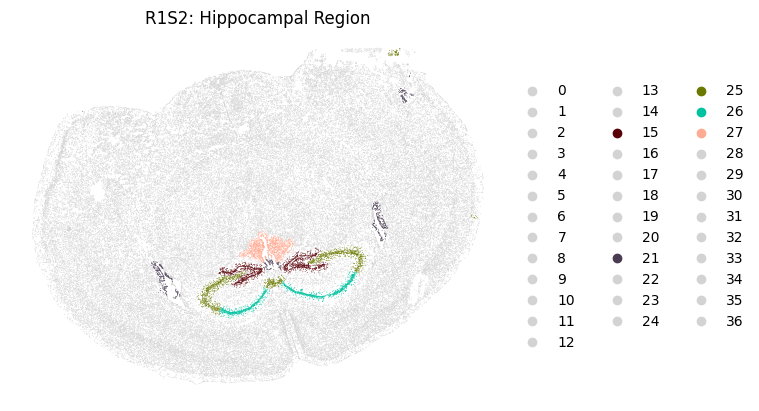

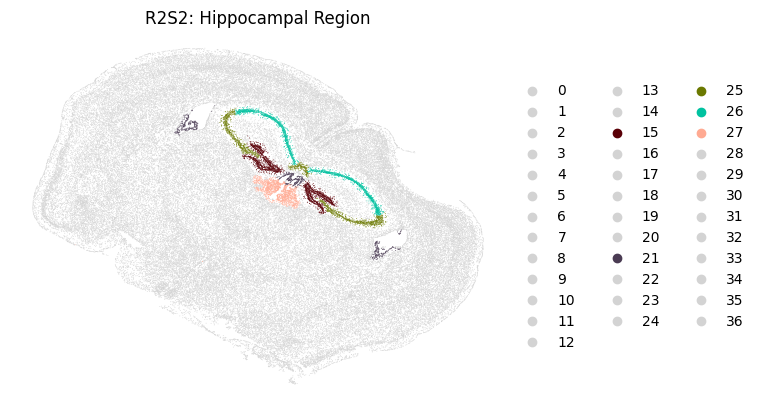

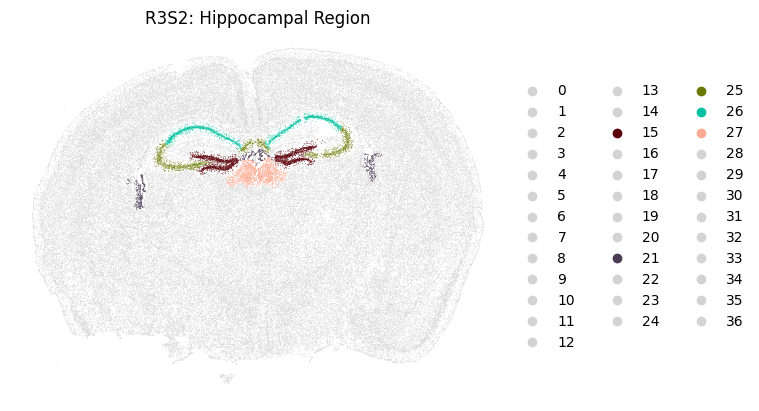

POSITION 1


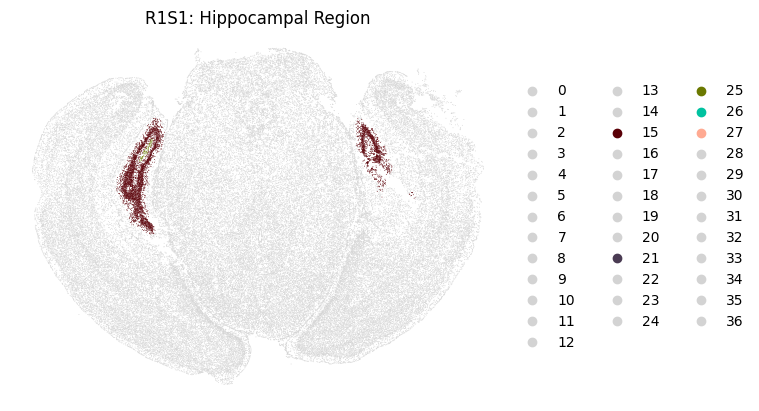

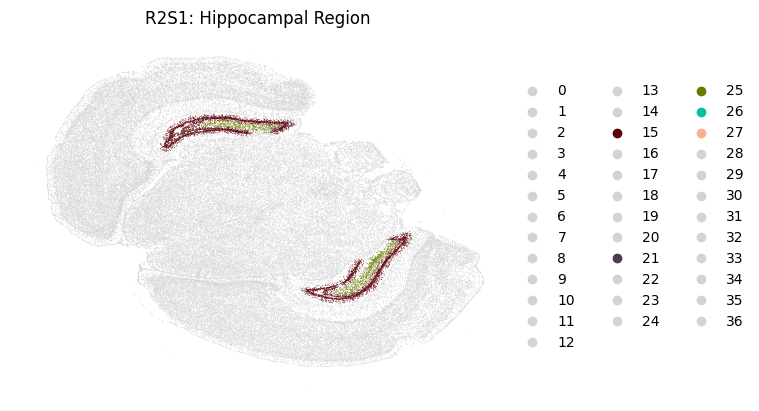

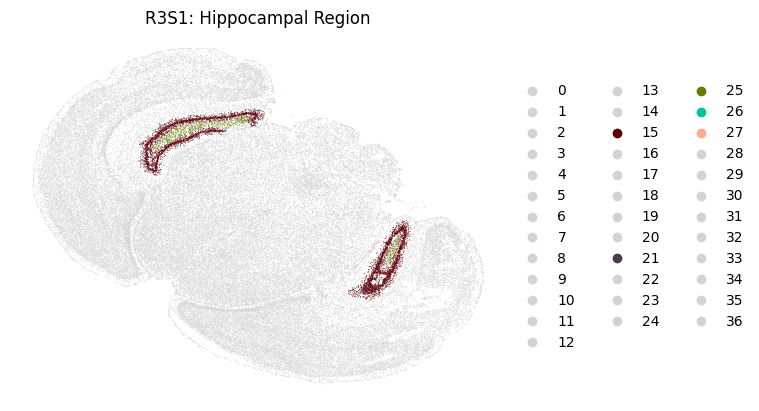

In [87]:
# Highlight Hippocampal region (Position 2 + Position 1)
print('POSITION 2')
plot_highlighted_clusters(
    msm,
    highlight_clusters=['26', '25', '15', '27', '21'],
    target_slices=['R1S2', 'R2S2', 'R3S2'],
    highlighted_region='Hippocampal Region'
)

print('POSITION 1')
plot_highlighted_clusters(
    msm,
    highlight_clusters=['26', '25', '15', '27', '21'],
    target_slices=['R1S1', 'R2S1', 'R3S1'],
    highlighted_region='Hippocampal Region'
)

POSITION 1


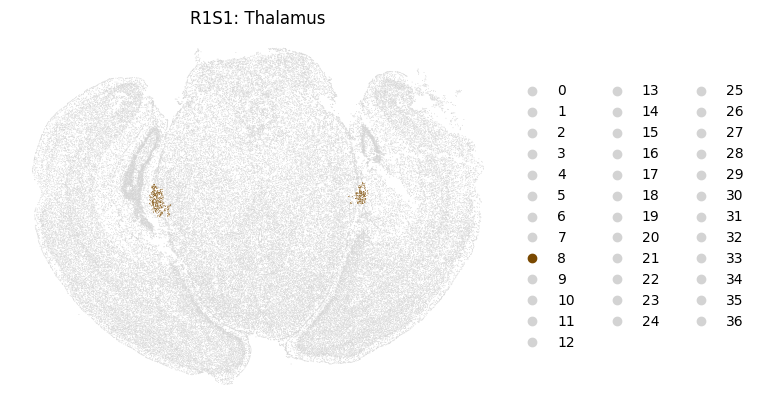

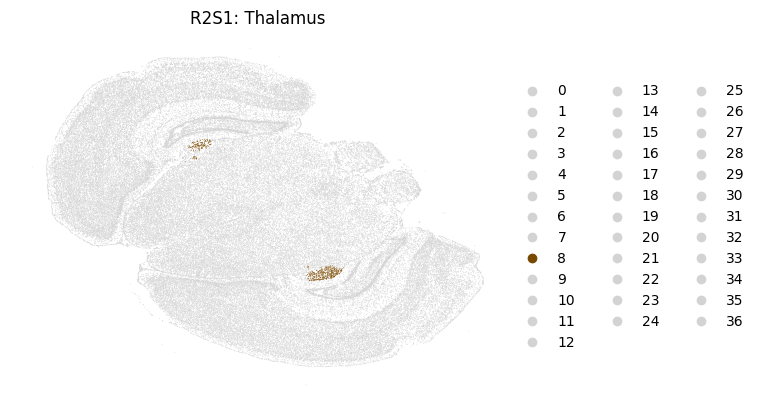

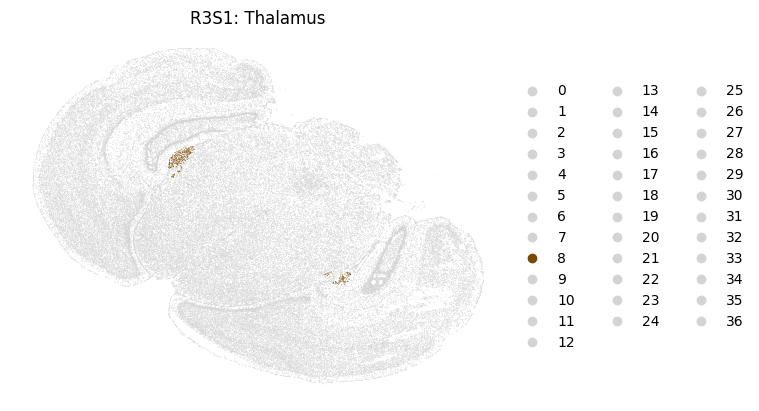

POSITION 2


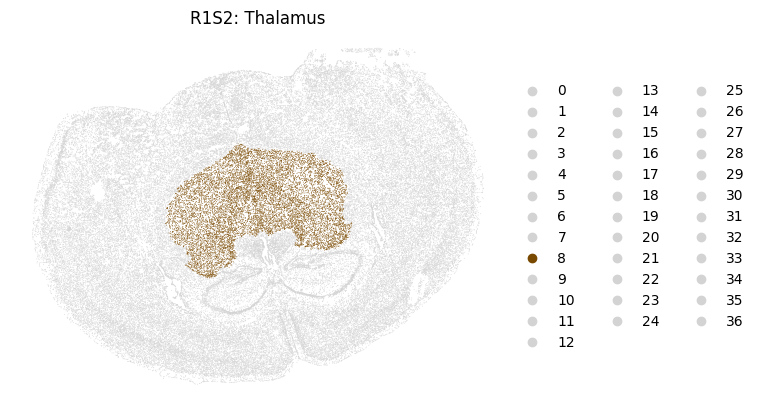

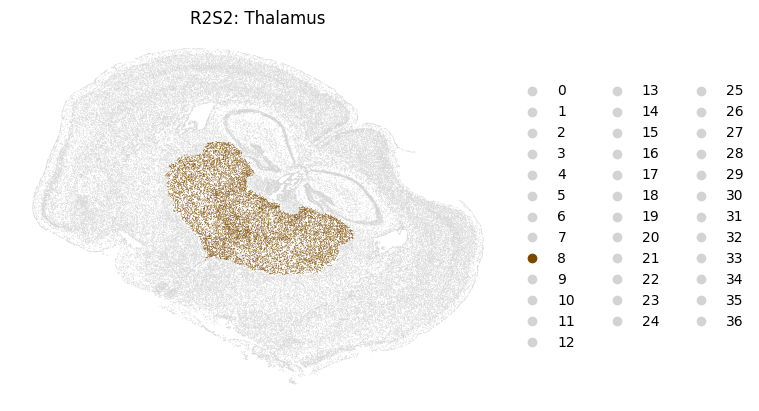

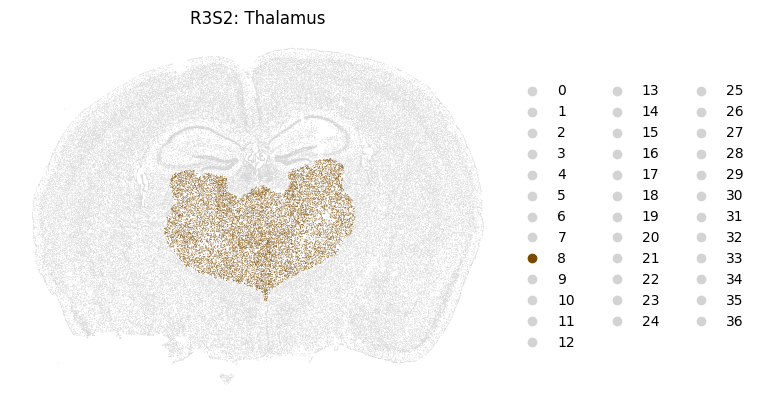

In [89]:
# Highlight Thalamus region (Position 1 + Position 2)
print('POSITION 1')
plot_highlighted_clusters(
    msm,
    highlight_clusters=['8'],
    target_slices=['R1S1', 'R2S1', 'R3S1'],
    highlighted_region='Thalamus'
)

print('POSITION 2')
plot_highlighted_clusters(
    msm,
    highlight_clusters=['8'],
    target_slices=['R1S2', 'R2S2', 'R3S2'],
    highlighted_region='Thalamus'
)

POSITION 2


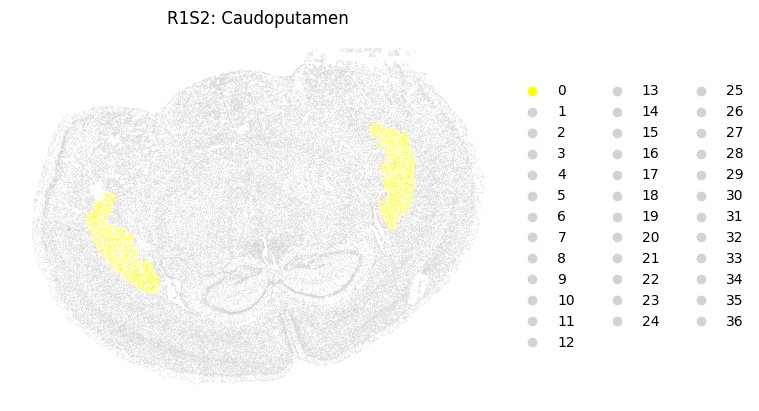

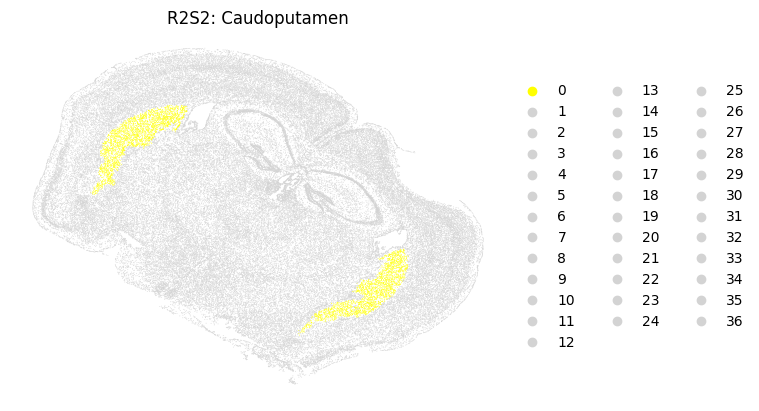

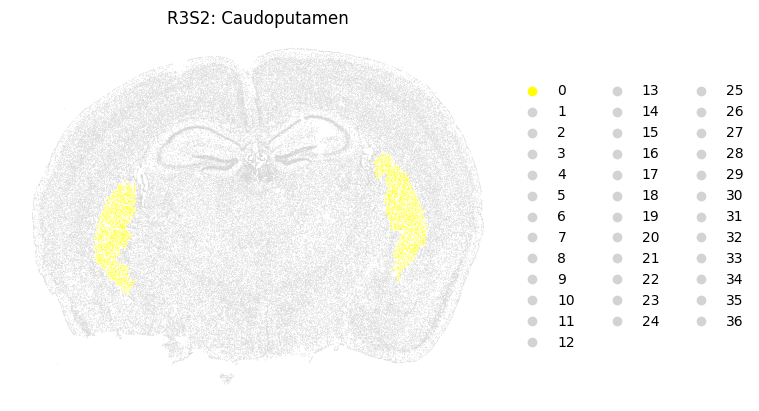

POSITION 2


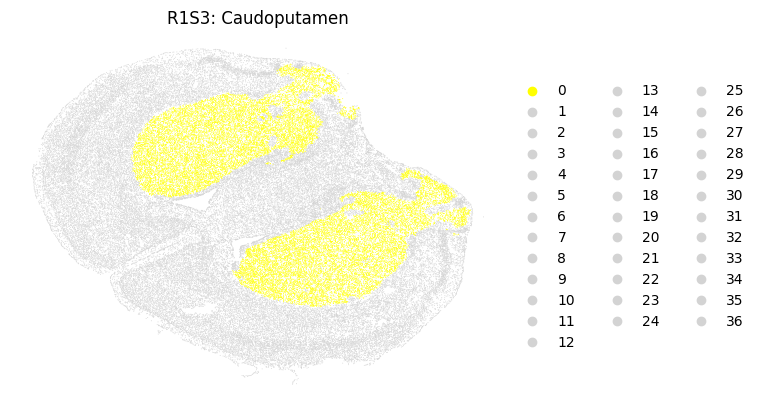

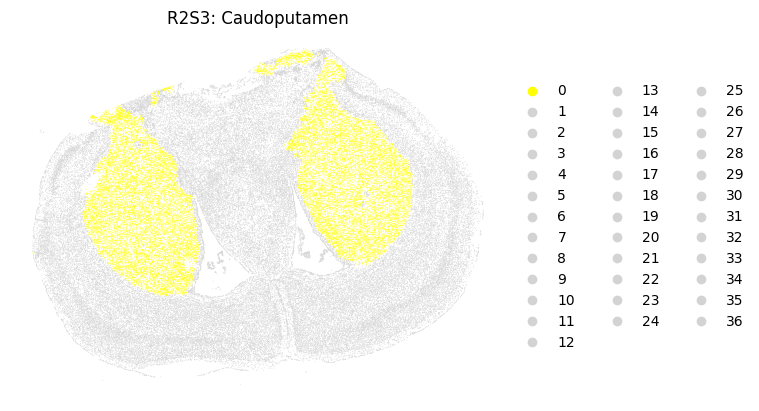

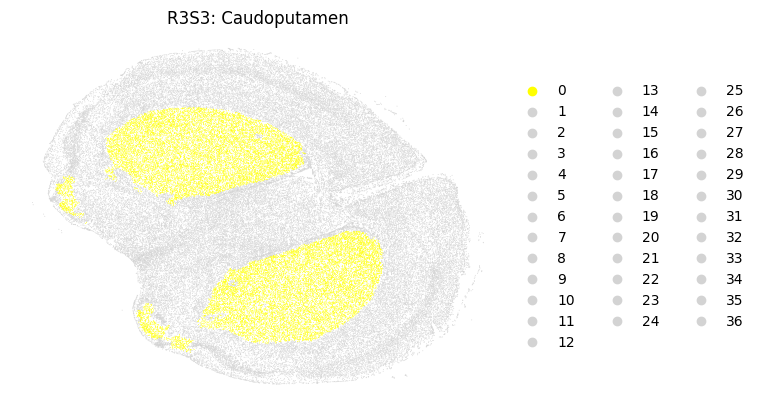

In [90]:
# Highlight Caudoputamen (Position 2 + Position 3)
print('POSITION 2')
plot_highlighted_clusters(
    msm,
    highlight_clusters=['0'],
    target_slices=['R1S2', 'R2S2', 'R3S2'],
    highlighted_region='Caudoputamen'
)

print('POSITION 2')
plot_highlighted_clusters(
    msm,
    highlight_clusters=['0'],
    target_slices=['R1S3', 'R2S3', 'R3S3'],
    highlighted_region='Caudoputamen'
)